# Netflix next banger

## Background

Netflix is a member-based internet entertainment service founded in 1997. The service allows members to watch tv-series, movies and documentaries through a streaming software on internet-connected devices against a monthly fee. Netflix’s content relies on a complex structure of algorithms that watches customer’s online use and are supposed to optimize satisfying decisions. Thus the company is in great need of user data. (Clares-Gavilán, Fernández-Manzano och Neira 2016, 568-576)

The company’s operational environment is characterized by hands-off approach to management. The workforce is heterogeneous, about 3,500 people who 
leaders trust to have the company’s best interests at heart and act correspondingly. (Gulati 2018, 4-13).  Furthermore a majority of Netflix’s content is from outside sources and the company’s operational flexibility is limited by outside partners (Ciejka 2018, 3-38).


## Problem description

As an effect of high competition and slow growth in the number of new subscribers Netflix share price has declined in fall 2019, hence Netflix wants to maximize the success of their next creation. The problem lies in not knowing what will be best received by the public. (Ny Teknik, 2019)

Additionally, by having some of its content come from outside sources, part of the problem becomes choosing the right content. If Netflix have to choose between several newly released movies or series, how will they know which one has the best chance of success?

In our project we will gather data from movies and their scripts. We will look for commonly used words, actors, genres and directors to predict which attributes Netflix should be the most interested in when creating their next movie and also which outside-produced movies they should add to their assortment. Finally upcoming movies will also be discussed with our analysed data in mind.


## Previous Studies
There are many different researches that has been carried out in the field using different approaches. Most of the studies found focuses on extracting data from social media to map how users online discussions, like reviews etc can predict a movies success. There are fewer studies that focuses on the attributes of a movie to explore how this is related to a movies success. 

In Ahmad et. al’s study Movie Success Prediction Using Data Mining (2017) the authors presents a study which aims to predict a movies success based on the weighted attributes budget, actors, director, producer, set locations, story writer, movie release day, competing movie releases at the same time, music, release location and target audience. The weighing is done using a mathematical model. It’s stated that “success cannot be predicted based on a particular attribute” and therefore weighing of multiple attributes will be integrated in this study as well. Furthermore the study gives a basic framework in how to value different attributes and what method to consider for the data mining. Lastly, the article shows how classification and clustering can be used in the context of prediction. It also gives a reference point to compare the results of this study to. 

Another similar study is Hammad Afzals article Prediction of Movies popularity Using Machine Learning Techniques (2016) which describes how machine learning approaches can predict an movies success based on datasets of IMDB scores and attributes. The most important finding of this article regarding the work of this report is that the attributes which contributed with most information was metascore and number of votes for each movie, Oscar awards won by the movies and the number of screens the movie is going to be screened which is considered in the choosing of attributes for this report. 

Furthermore Meenakshi et al also try to determine a movies success using several of the same attributes in their 2018 study. In the paper A Data mining Technique for Analyzing and Predicting the success of Movie they employ a decision tree together with clusters to categorize movies as either “Flop”, “Average” or “Hit”. They found that budget was no indication of how well a movie would be rated, and that genre was the most important node in their decision tree. (Meenakshi et al. 2018, 1-6)

The paper Predicting movie success and academy awards through sentiment and social network analysis talks about how much influence online communities have on the actual success of movies. The paper focuses on a model that that predicts academy award nominees by researching the opinions of online communities. Afterwards it uses the same approach to see if there is a correlation between online communities and movie success at the box office. By doing this, the study were able to predict different real events, such as nine academy award winners, by considering and using mentioned models on social networks in movie communities online.(Jonas Sebastian Krauss et al. 2008, 9-10). 


## Data collection

importing data from 4 separate tables: 
 - movies_metadata, containing several diffrerent attributes
 - title_principals, containing a connection between a movie and its cast members
 - movie_names, containing information about cast members
 - data_ratings, containing ratings from imdb 

In [1]:
import numpy as np
import csv

movie_data = []
title_principals = []
movie_names = []

with open('movies_metadata.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        movie_data.append(row)
        
with open('title_principals.tsv', encoding="utf8") as tsvfile4:
    reader_titles = csv.reader(tsvfile4, delimiter='\t')
    for row in reader_titles:
        title_principals.append(row)

with open('movie_names.tsv', encoding="utf8") as tsvfile4:
    reader_rating = csv.reader(tsvfile4, delimiter='\t')
    for row in reader_rating:
        movie_names.append(row)

Defining some functions needed later:

In [58]:
def get_number(string):
    try:
        return (int) (string[2:])
    except:
        return 0
    
def custom_sort(t):
    return t[0]

# Formats a string read from .csv file intended to be an array.
def string_to_array(arraystring):
    arraystring = arraystring.replace(' ', '')
    arraystring = arraystring.replace('[', '')
    arraystring = arraystring.replace(']', '')
    arraystring = arraystring.replace('\'', '')
    array = arraystring.split(',')
    return array

def try_parse_float(input):
    try:
        number = float(input)
    except:
        number = -1
    return number

# Takes a actor-id and returns a name
def get_name(actor):
    actor_id = get_number(actor)
    count = 0
    for name in movie_names:
        count += 1
        if(actor == name[0]):
            return name[1]

Selecting attributes, formatting genres

In [160]:
movie_data_np = np.array(movie_data[1:])
movie_data_selected_attributes = []

# Selecting attributes
for movie in movie_data_np:
    if(len(movie) > 22):
        movie_data_selected_attributes.append([movie[6], movie[3], movie[8], movie[14], movie[22], movie[23]])
        
movie_data_stripped_genres = []

# Rearranging genres
for movie in movie_data_selected_attributes:
    genre_arr = movie[1].split('\'')
    genres = []
    for i in range(5, len(genre_arr), 6):
        genres.append(genre_arr[i])       
    movie_data_stripped_genres.append([movie[0], genres, movie[2], movie[3], movie[4], movie[5]])

movies_above_7 = []

movie_data_stripped_genres.sort(key=custom_sort)

# Filter out movies with rating < 7.0
for movie in movie_data_stripped_genres:
    if(try_parse_float(movie[4]) >= 7.0):
        movies_above_7.append(movie)
        
movies_above_7 = movies_above_7[3:]

We define a function to help compare on ids. All imdb-ids consist of "xx0124002" where x is a letter. With this function we iterate through title_principals, the list with all connections, and movies_above_7, our filtered, sorted, list of movies. The connection is made by comparing ids from both lists, where movie_id iterates to "catch up" to title_id since many there are many more titles than movies in our lists.

The list with movie list is then filtered to remove any movie that did not have a corresponding crew.

In [161]:
movies_with_crew = []

# Iterate through title_principals and movies_above_7, join on id.
j = 0
movie_id = 0
for i in range(len(title_principals)):
    title_id = get_number(title_principals[i][0])
    while(movie_id < title_id):
        j += 1
        if(j > len(movies_above_7) -1):
            break
        movie_id = get_number(movies_above_7[j][0])
    if(movie_id == title_id):
        if(j > len(movies_above_7) -1):
            break
        movies_above_7[j].append([title_principals[i][2],title_principals[i][3]])
        
movies_with_actors = []

# Remove non-matches, missing values
for movie in movies_above_7:
    if(len(movie) > 6):
        movies_with_actors.append(movie)

This list is saved as "movies_and_crew.csv" to not have to do this tedious task again...

In [8]:
with open('movies_and_crew.csv', 'w', encoding='utf-8') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(movies_with_actors)

Read movies_and_crew:

In [3]:
import csv
movies_and_crew = []

with open('movies_and_crew.csv', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if(len(row) > 0):
            movies_and_crew.append(row)

Filter out movies before 1960. Remove all non-actors from movie_names. Defines a function to look for an array of actor ids and return corresponding names. Loop breaks early if index at actor_id is reached, since the actor list is sorted we can assume no actor is beyond their own id as index. 

In [7]:
movies_after_1960 = []

# Remove movies before 1960
for movie in movies_and_crew:
    if(try_parse_float(movie[3].split('-')[0]) >= 1960):
        movies_after_1960.append(movie)

Connect all actors in the movie on id and replace with names of actors in initial array. To do this, first the movie_names list is filtered to remove any non-actor.

In [164]:
movies_with_actor_names = []
progress = 0
# Replace actor ids with names
for movie in movies_after_1960:
    actor_info = []
    crew = []
    for actor in movie[6:]:
        actor_info = string_to_array(actor)
        actor_info[0] = get_name(actor_info[0])
        crew.append(actor_info)
    progress += 1
    if(progress % 10 == 0):
        print("Progress...", round(progress/49, 2), "%")
    movies_with_actor_names.append([movie[:5], crew])

KeyboardInterrupt: 

Aaaaand we save it.

In [111]:
with open('movies_and_crew_names.csv', 'w', encoding='utf-8') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(movies_with_actor_names)

Checkpoint 1! (Project can be started from here)

In [170]:
movies_with_actor_names = []

with open('movies_and_crew_names.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if(len(row) > 0):
            movies_with_actor_names.append(row)

movies_with_actor_names = movies_with_actor_names[1:]
movies = []

for movie in movies_with_actor_names:
    info = string_to_array(movie[0])
    crew = string_to_array(movie[1])
    crew_roles = []
    for i in range(0, len(crew), 2):
        crew_roles.append([crew[i], crew[i+1]])
    movies.append([info, crew_roles])

Somewhere around here we realised the ratings were from Tmbd and not Imdb. We want as many user votes as possible, so imdbs rating were added instead. Structure of the array is also updated and saved

In [178]:
ratings = []

with open('data_ratings.tsv', encoding="utf8") as tsvfile4:
    reader_titles = csv.reader(tsvfile4, delimiter='\t')
    for row in reader_titles:
        ratings.append(row)
        
def get_num_rating(id):
    for rating in ratings:
        if(rating[0] == id):
            return rating[2]

def get_avg_rating(id):
    for rating in ratings:
        if(rating[0] == id):
            return rating[1]
        
def clean_string(string):
    string = string.replace(' ', '')
    string = string.replace('[', '')
    string = string.replace(']', '')
    string = string.replace('\'', '')
    return string

In [173]:
new_movies = []

for movie in movies:
    new_movie = []
    avg_rating = get_avg_rating(movie[0][0])
    num_rating = get_num_rating(movie[0][0])
    for info in movie[0][0:len(movie[0] + movie[1])-11]:
        new_movie.append(info)
    new_movie.append(avg_rating)
    new_movie.append(num_rating)
    for crew in movie[1]:
        new_movie.append(crew)
    new_movies.append(new_movie)

In [174]:
for movie in new_movies:
    try:
        movie[1] = movie[1].replace('\"', '')
        movie[2] = movie[2].replace('\"', '')
        movie[3] = movie[3].replace('\"', '')
    except:
        next

In [175]:
with open('complete.csv', 'w', encoding='utf-8') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(new_movies)

Checkpoint 2!

In [382]:
import csv

movies = []

with open('complete.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if(len(row) > 0):
            movies.append(row)

movies = movies[1:]

genres_imdb = ['Crime', 'Drama', 'Comedy', 'Thriller', 'Romance', 'Horror', 'War', 'History', 'Fantasy', 'Mystery', 'Music', 'Foreign', 'Crime', 'ScienceFiction', 'Action', 'Documentary', 'Animation', 'Adventure', 'Family', 'Superhero', 'Biography', 'Film Noir', 'Musical', 'Short', 'Sport', 'Western']

def is_genre(item):
    return (item in genres_imdb)

def get_nr_of_crew(movie):
    count = 0
    for part in movie:
        try:
            if(part[0] == '['):
                count += 1
        except:
            next
    return count

In [383]:
movies_sorted_crew = []
count = 0
for movie in movies:
    full_arr = []
    genres = []
    actors = []
    directors = []
    writers = []
    producer = []
    composer = []
    count += 1
    genre_count = 0
    nr_of_crew = get_nr_of_crew(movie)
    for member in movie[-nr_of_crew:]:
        member_arr = string_to_array(member)
        try:
            if(member_arr[1] == "actor" or member_arr[1] == "actress" or member_arr[1] == "self"):
                actors.append(member_arr[0])
            if(member_arr[1] == "director"):
                directors.append(member_arr[0])
            if(member_arr[1] == "writer"):
                writers.append(member_arr[0])
            if(member_arr[1] == "producer"):
                producer.append(member_arr[0])
            if(member_arr[1] == "composer"):
                composer.append(member_arr[0])
        except:
            print("not a member", member_arr, member, count)
    try:
        for item in movie[1:-(nr_of_crew + 2)]:
            genre_count += 1
            if(is_genre(item)):
                genres.append(item)
        full_arr.append(movie[-(nr_of_crew + 2)])
        full_arr.append(genres)
        full_arr.append(movie[-(nr_of_crew + 1)])
        full_arr.append(actors)
        full_arr.append(directors)
        full_arr.append(writers)
        full_arr.append(producer)
        full_arr.append(composer)
        movies_sorted_crew.append(full_arr)
    except:
        print("Error at index", count)

In [384]:
with open('complete_formatted.csv', 'w', encoding='utf-8') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(movies_sorted_crew)

## Data analysis

*Document you choice and motivation for selected data mining method(s) here. Choose a data mining method(s) to use in Python code to perform an analysis of your chosen dataset. Describe why you chose the method(s) and what interesting things you have found from the analysis.*

*Replace the contents of this cell with your own text.*

In [391]:
import pandas as dp
import csv
import matplotlib
import matplotlib.pyplot as plt

movies = []

with open('complete_formatted.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if(len(row) > 0):
            movies.append(row)

movies_df = dp.DataFrame(movies)

In [392]:
movies_df = dp.DataFrame(movies_df)
movies_df = movies_df.rename(columns={0:"Genres",1:"Number_of_votes",2:"Rating",3:"Actors",4:"Director",5:"Writers",6:"Producers",7:"Composers"})
movies_df

,Genres,Number_of_votes,Rating,Actors,Director,Writers,Producers,Composers
0,"['Comedy', 'Crime', 'Thriller']",3392,7.3,"['JackHawkins', 'NigelPatrick', 'RogerLivesey'...",['BasilDearden'],"['JohnBoland', 'BryanForbes']",['MichaelRelph'],['PhilipGreen']
1,"['Drama', 'Romance']",2701,7.9,"['InnokentiySmoktunovskiy', 'TatyanaSamoylova'...",['MikhailKalatozov'],"['GrigoriyKoltunov', 'ValeriOsipov', 'ViktorRo...",[],['NikolaiKryukov']
2,['Drama'],1572,6.9,"['AnthonyQuinn', 'YôkoTani', '""PeterOToole""', ...",['NicholasRay'],"['HansRuesch', 'FrancoSolinas', 'BaccioBandini']",['MalenoMalenotti'],['AngeloFrancescoLavagnino']
3,['Drama'],1512,7.3,"['JessHahn', 'MichèleGirardon', 'VanDoude', 'P...",['ÉricRohmer'],['PaulGégauff'],['ClaudeChabrol'],['LouisSaguer']
4,"['Drama', 'Horror', 'Thriller']",23803,7.7,"['PierreBrasseur', 'AlidaValli', 'JulietteMayn...",['GeorgesFranju'],"['PierreGascar', 'JeanRedon', 'PierreBoileau',...",[],[]
...,...,...,...,...,...,...,...,...
4957,"['Drama', 'History', 'War']",44203,8.5,"['MarcMenchaca', 'AlexanderSkarsgård', 'JamesR...",[],[],[],[]
4958,['Drama'],14548,7.2,"['""VincentDOnofrio""', 'RodrigoSantoro', 'Diego...","['JeffZimbalist', 'MichaelZimbalist']",[],"['ColinWilson', 'BrianGrazer', 'IvanOrlic', 'K...",[]
4959,"['Drama', 'Romance']",8545,7.1,"['LudivineSagnier', 'LouisGarrel', 'ClotildeHe...",['ChristopheHonoré'],[],['PauloBranco'],['AlexBeaupain']
4960,['Documentary'],57,7.3,"['IrvingFine', 'RobertWagner', 'DelArmstrong',...",['CaroleLanger'],['LukeSacher'],[],['TimmyCappello']


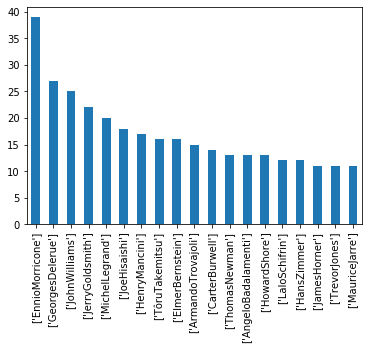

In [410]:
_ = movies_df.Composers.value_counts()[1:20].plot.bar()

In [414]:
movies_df.sort_values("Rating", inplace=True, ascending=False)
movies_df[0:100]

,Genres,Number_of_votes,Rating,Actors,Director,Writers,Producers,Composers
3156,"['Action', 'Drama', 'War']",336744,9.5,"['PhilipBarantini', 'ScottGrimes', 'DamianLewi...",[],[],[],[]
4693,['Documentary'],154435,9.4,"['MikeHolding', 'DavidAttenborough', 'Sigourne...",[],[],[],[]
2976,[],14192,9.3,[],['FrancisFordCoppola'],['MarioPuzo'],['AlRuddy'],"['CarmineCoppola', 'NinoRota']"
2434,"['Drama', 'Crime']",2158341,9.3,"['TimRobbins', 'MorganFreeman', 'BobGunton', '...",['FrankDarabont'],['StephenKing'],['NikiMarvin'],['ThomasNewman']
1359,[],623,9.3,"['DouglasFairbanksJr.', 'JamesMason', 'ViolaDa...",[],[],[],[]
...,...,...,...,...,...,...,...,...
2984,['Comedy'],2733,8.6,['BillHicks'],['ChrisBould'],[],['CharlesBrand'],[]
4744,"['Adventure', 'Drama', 'ScienceFiction']",1347034,8.6,"['MatthewMcConaughey', 'AnneHathaway', 'Jessic...",['ChristopherNolan'],['JonathanNolan'],"['LyndaObst', 'EmmaThomas']",['HansZimmer']
4410,"['War', 'Documentary', 'History']",4087,8.6,"['JozefPaczynski', 'SamuelWest', 'Horst-Günter...",[],[],[],[]
4896,['Comedy'],7513,8.6,['LouisC.K.'],['StevenJ.Santos'],[],['LeoClarke'],[]


## Evaluation of results

*Document an evaluation your analysis results and describe how potentially actionable they are.*

*Replace the contents of this cell with your own text.*

In [ ]:
# Add your own code

## Schedule and description of project plan

*Rough schedule for the project beyond the pilot study presented in 3-5. This does not have to be advanced, you can simply provide an estimate based upon reported schedules for similar projects in the literature.*

*Replace the contents of this cell with your own text.*

## Ethical aspects that need to be considered

*Are there ethical aspects that need to be considered? Are there legal implications (e.g., personal data / GDPR)? Are there implications if the case organization is a business, public authority, or nonprofit entity?*

*Replace the contents of this cell with your own text.*